In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
df = pd.read_csv('C:/Users/MedOvich/IdeaProjects/jobs-salary-project/data/glassdoor_jobs_data_cleaned.csv')

In [124]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,min_salary,max_salary,avg_salary,job_state,age,Python,SQL,PowerBI,Tableau,AWS
0,Data Scientist,$60 - $90 Per Hour(Employer est.),*will work ONSITE 2-3 days each week\nThe data...,NaN,Mint-Technologies,"Richmond, VA",1 to 50 Employees,NaN,Company - Private,NaN,...,60,90,75.0,VA,NaN,0,0,0,0,0
1,Data Scientist,$150K - $180K (Employer est.),Data Scientist\nLocation: 100% Remote\nHire ty...,4.6,Kani,Remote,201 to 500 Employees,2009.0,Company - Private,Information Technology Support Services,...,150,180,165.0,NaN,13.0,0,0,0,0,0
2,Junior Data Scientist,$80K - $120K (Employer est.),Responsibilities:\nWork with stakeholders to d...,NaN,Talentheed,Remote,NaN,NaN,NaN,NaN,...,80,120,100.0,NaN,NaN,0,0,0,0,0
3,Data Scientist,$80K - $114K (Glassdoor est.),Who We’re Looking For\n\nToyota Motors North A...,3.9,Toyota,"Plano, TX",10000+ Employees,1957.0,Company - Public,Transportation Equipment Manufacturing,...,80,114,97.0,TX,65.0,0,0,0,0,0
4,Data Scientist,$95K (Employer est.),Company Description\n\nWe’re a six-time “Best ...,3.8,Logic20/20,"Seattle, WA",201 to 500 Employees,2005.0,Company - Private,Business Consulting,...,95,95,95.0,WA,17.0,0,0,0,0,0


In [125]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'age', 'Python',
       'SQL', 'PowerBI', 'Tableau', 'AWS'],
      dtype='object')

In [126]:
df.drop(df[df.Founded.isna()].index, inplace=True)
df.drop(df[df.Rating.isna()].index, inplace =True)

In [127]:
df['Job Title'].value_counts()

Data Scientist                                                          175
Junior Data Scientist                                                    55
data scientist (multiple openings) - Remote                              34
Data Scientist, Personalization                                          34
Data Science Associate (Remote)                                          32
VIE New York City- Data Scientist                                        32
Data Scientist or Bioinformatician                                       31
Data Scientist / Senior Data Scientist - Global Commercial Analytics     31
Associate Data Scientist / Data Scientist - Marketing Analytics          31
Data Scientist (Entry Level)                                             30
Junior Data Scientist, Supply Chain                                      30
decision scientist (multiple openings) - Remote                          30
Data Scientist (Remote)                                                  29
Data Scienti

In [128]:
def seniority(job_title):
    if 'senior' in job_title.lower():
        return 'senior'
    elif 'sr' in job_title.lower():
        return 'senior'
    elif 'junior' in job_title.lower():
        return 'junior'
    elif 'jr' in job_title.lower():
        return 'junior'
    else:
        return 'na'
    
def simplify(job_title):
    if 'data scientist' in job_title.lower():
        return 'data scientist'
    else:
        return 'na'

In [129]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        554
junior     89
senior     39
Name: seniority, dtype: int64

In [130]:
df['Job Title'] = df['Job Title'].apply(simplify)
df['Job Title'].value_counts()

data scientist    596
na                 86
Name: Job Title, dtype: int64

In [131]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,job_state,age,Python,SQL,PowerBI,Tableau,AWS,seniority
1,data scientist,$150K - $180K (Employer est.),Data Scientist\nLocation: 100% Remote\nHire ty...,4.6,Kani,Remote,201 to 500 Employees,2009.0,Company - Private,Information Technology Support Services,...,180,165.0,NaN,13.0,0,0,0,0,0,na
3,data scientist,$80K - $114K (Glassdoor est.),Who We’re Looking For\n\nToyota Motors North A...,3.9,Toyota,"Plano, TX",10000+ Employees,1957.0,Company - Public,Transportation Equipment Manufacturing,...,114,97.0,TX,65.0,0,0,0,0,0,na
4,data scientist,$95K (Employer est.),Company Description\n\nWe’re a six-time “Best ...,3.8,Logic20/20,"Seattle, WA",201 to 500 Employees,2005.0,Company - Private,Business Consulting,...,95,95.0,WA,17.0,0,0,0,0,0,na
7,data scientist,$82K - $137K (Employer est.),Responsibilities:\nPrincipal is seeking a Data...,4.0,Principal,"Des Moines, IA",10000+ Employees,1879.0,Company - Public,Investment & Asset Management,...,137,109.5,IA,143.0,0,0,0,0,0,na
8,data scientist,$90K - $145K (Employer est.),Company Description\n\nSia Partners is a next-...,4.0,Sia,"New York, NY",1001 to 5000 Employees,1999.0,Company - Private,Business Consulting,...,145,117.5,NY,23.0,0,0,0,0,0,na


In [132]:
df['job_desc_lenght'] = df['Job Description'].apply(lambda x: len(x))
df.job_desc_lenght.value_counts()

174     64
629     34
927     32
1583    32
702     32
1300    32
1089    31
515     31
832     31
888     30
1214    29
643     29
1315    26
919     26
3480    25
897     24
2007    24
5371    22
183     21
613     18
1212    11
172      9
203      8
825      8
1529     4
2168     4
634      3
802      3
1877     3
954      3
594      3
1114     2
1005     2
864      2
856      2
800      2
519      1
774      1
959      1
889      1
1126     1
1136     1
118      1
870      1
699      1
464      1
1701     1
2719     1
1290     1
667      1
2703     1
369      1
1579     1
437      1
1473     1
4117     1
Name: job_desc_lenght, dtype: int64

In [133]:
df.min_salary

1      150
3       80
4       95
7       82
8       90
      ... 
947     96
948     76
950    115
952     61
953     89
Name: min_salary, Length: 682, dtype: int64

In [134]:
df.min_salary = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis =1)
df.max_salary = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis =1)

In [135]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,Python,SQL,PowerBI,Tableau,AWS,job_desc_lenght
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.0,682.0,682.000000,682.000000
mean,4.025513,1955.153959,0.007331,0.453079,81.882698,125.989736,103.289589,66.846041,0.171554,0.111437,0.0,0.0,0.032258,1124.774194
std,0.357746,49.896351,0.085372,0.498159,20.432785,35.524286,24.301099,49.896351,0.377269,0.314903,0.0,0.0,0.176814,1033.622286
min,2.100000,1850.000000,0.000000,0.000000,46.000000,60.000000,50.000000,5.000000,0.000000,0.000000,0.0,0.0,0.000000,118.000000
25%,3.800000,1912.000000,0.000000,0.000000,65.000000,96.000000,80.500000,18.000000,0.000000,0.000000,0.0,0.0,0.000000,629.000000
50%,4.000000,1971.000000,0.000000,0.000000,88.000000,120.000000,107.500000,51.000000,0.000000,0.000000,0.0,0.0,0.000000,897.000000
75%,4.200000,2004.000000,0.000000,1.000000,94.000000,145.000000,118.625000,110.000000,0.000000,0.000000,0.0,0.0,0.000000,1300.000000
max,5.000000,2017.000000,1.000000,1.000000,204.000000,230.000000,187.500000,172.000000,1.000000,1.000000,0.0,0.0,1.000000,5371.000000


In [136]:
df.Rating.value_counts()

3.9    139
4.3     91
3.8     88
4.0     87
4.2     78
4.1     39
3.7     39
4.4     34
5.0     32
3.5     29
3.3      8
3.0      4
4.6      3
2.9      3
3.1      2
2.1      2
3.6      2
3.4      1
4.8      1
Name: Rating, dtype: int64

<AxesSubplot:>

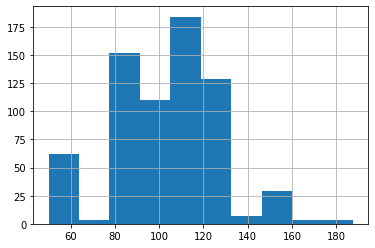

In [138]:
df.avg_salary.hist()

<AxesSubplot:>

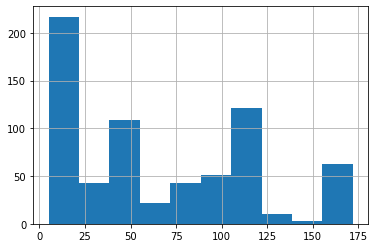

In [139]:
df.age.hist()

<AxesSubplot:>

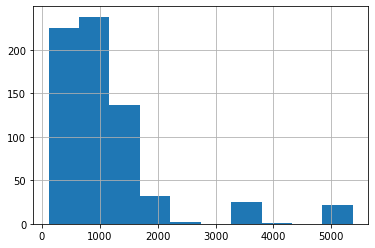

In [140]:
df.job_desc_lenght.hist()

<AxesSubplot:>

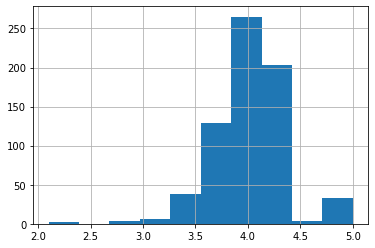

In [141]:
df.Rating.hist()

<AxesSubplot:>

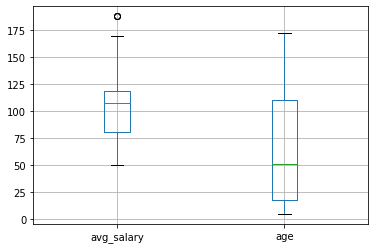

In [143]:
df.boxplot(column = ['avg_salary', 'age'])

<AxesSubplot:>

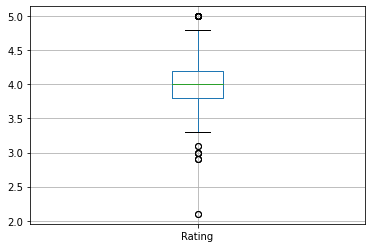

In [144]:
df.boxplot('Rating')

<AxesSubplot:>

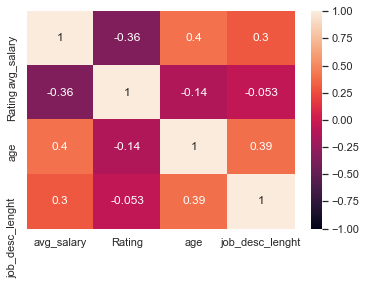

In [148]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df[['avg_salary','Rating','age','job_desc_lenght']].corr()

sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

In [149]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'job_state', 'age', 'Python',
       'SQL', 'PowerBI', 'Tableau', 'AWS', 'seniority', 'job_desc_lenght'],
      dtype='object')

In [150]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Name', 'job_state', 'Python', 'SQL', 'PowerBI', 'Tableau', 'AWS', 'Job Title', 'seniority']]

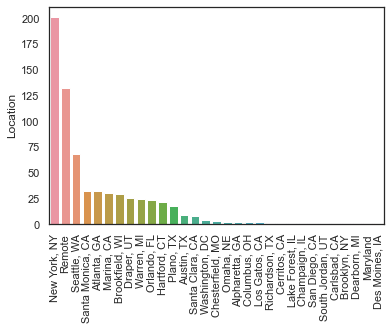

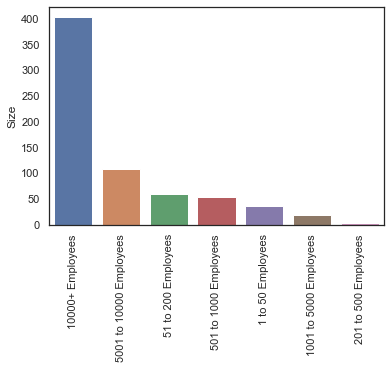

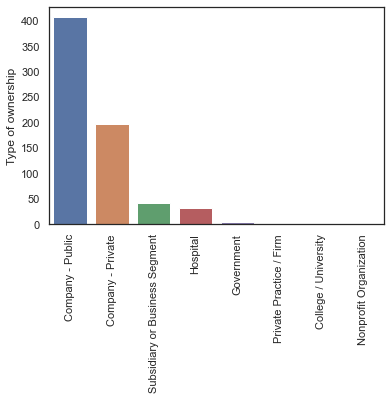

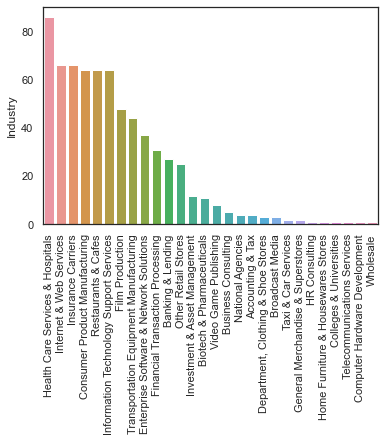

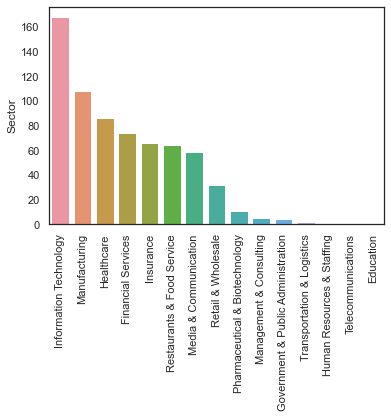

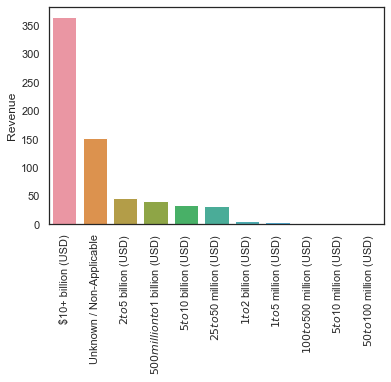

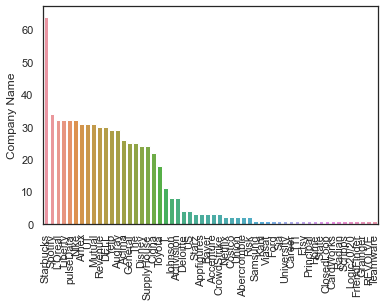

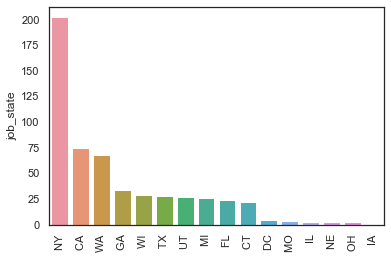

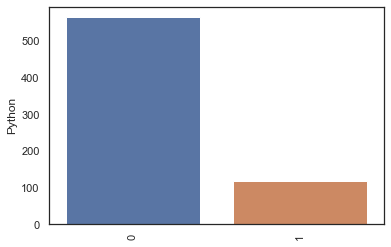

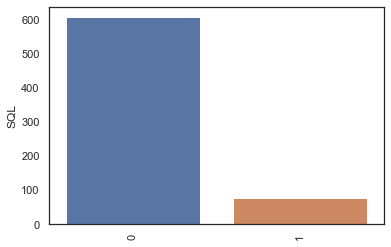

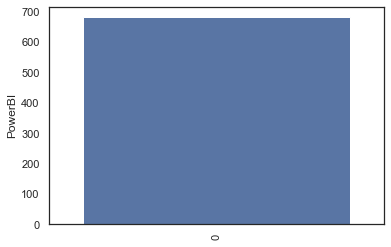

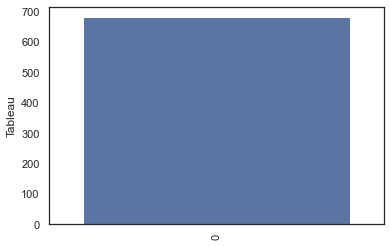

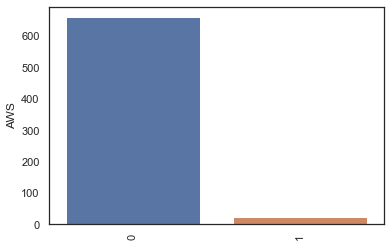

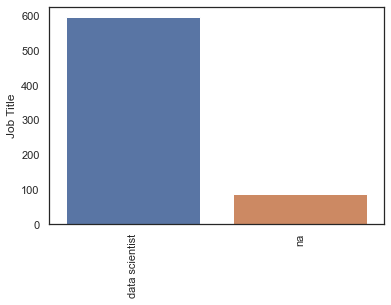

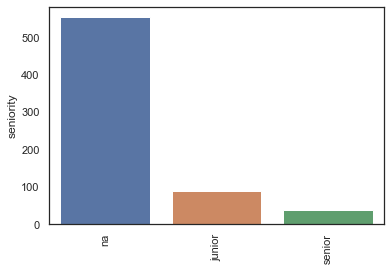

In [154]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [155]:
pd.pivot_table(df, index = 'Job Title', values = 'avg_salary')

,avg_salary
Job Title,
data scientist,107.098154
na,76.895349


In [156]:
pd.pivot_table(df, index = ['Job Title', 'seniority'], values = 'avg_salary')

avg_salary
Job Title      seniority            
data scientist junior      76.578652
               na         110.849359
               senior     131.730769
na             na          76.895349

In [158]:
pd.pivot_table(df, index = ['job_state','Job Title'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

,,avg_salary
job_state,Job Title,
DC,data scientist,143.000000
CT,data scientist,128.000000
NY,data scientist,115.735294
MO,data scientist,115.000000
MI,data scientist,114.000000
IA,data scientist,109.500000
CA,data scientist,106.886667
NE,data scientist,101.000000
TX,data scientist,98.375000
